In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
chess = pd.read_csv(r"C:\Users\Meiyappan\Desktop\Data Science-Jupyter Notebook\Kaggle\chess_king_rook_dataset.csv")

chess.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [48]:
chess["result"].value_counts()

fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: result, dtype: int64

In [49]:
chess.shape

(28056, 7)

In [50]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white_king_file  28056 non-null  object
 1   white_king_rank  28056 non-null  int64 
 2   white_rook_file  28056 non-null  object
 3   white_rook_rank  28056 non-null  int64 
 4   black_king_file  28056 non-null  object
 5   black_king_rank  28056 non-null  int64 
 6   result           28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [51]:
chess.describe(include="all")

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
count,28056,28056.000000,28056,28056.000000,28056,28056.000000,28056
unique,4,NaN,8,NaN,8,NaN,18
top,d,NaN,h,NaN,h,NaN,fourteen
freq,12136,NaN,3616,NaN,4848,NaN,4553
mean,NaN,1.854006,NaN,4.512404,NaN,4.451811,NaN
std,NaN,0.926414,NaN,2.282723,NaN,2.248387,NaN
min,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,1.000000,NaN,3.000000,NaN,3.000000,NaN
50%,NaN,2.000000,NaN,5.000000,NaN,4.000000,NaN
75%,NaN,2.000000,NaN,6.000000,NaN,6.000000,NaN


#### STEP 1: HANDLING NULL VALUES

In [52]:
# No Null values

chess.isna().sum()

white_king_file    0
white_king_rank    0
white_rook_file    0
white_rook_rank    0
black_king_file    0
black_king_rank    0
result             0
dtype: int64

####  STEP 2: OUTLIERS

In [53]:
# sns.distplot(chess["result"])

#### STEP 3: SCALING

In [54]:
# NO NEED FOR SCALING HERE

#### STEP 4: CATEGORICAL ENCODING

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

chess[["white_king_file", "white_rook_file", "black_king_file", "result"]] = chess[["white_king_file", "white_rook_file", "black_king_file", "result"]].apply(le.fit_transform)

In [56]:
chess.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


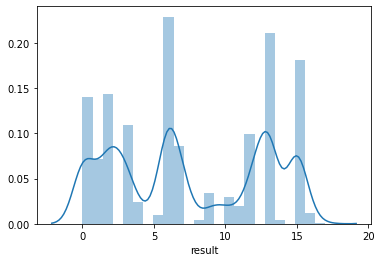

In [57]:
sns.distplot(chess["result"])

C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.p

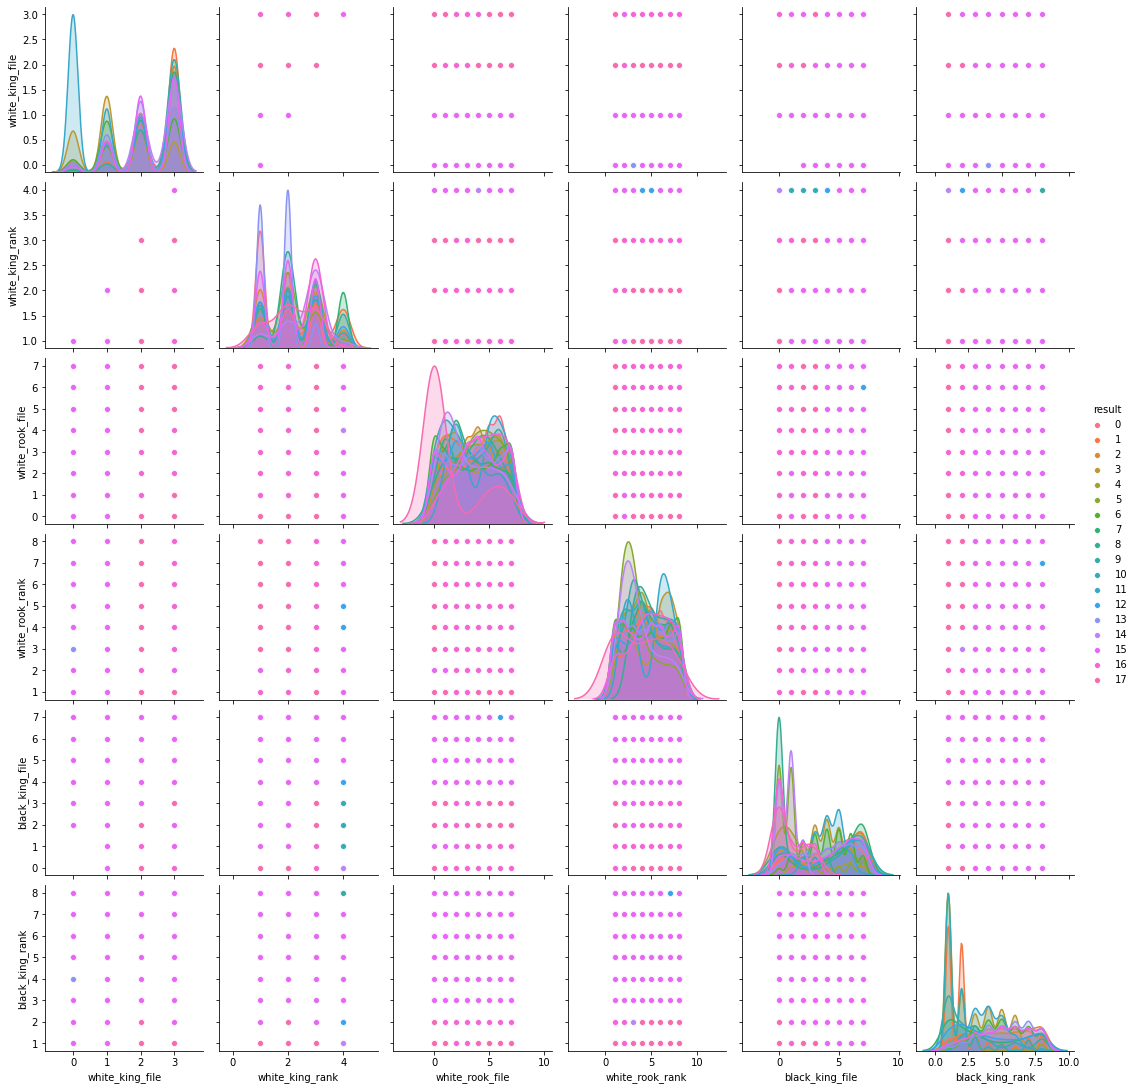

In [58]:
sns.pairplot(chess, hue="result")

In [59]:
correlation = chess.corr()

correlation

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
white_king_file,1.000000,0.453896,-0.014571,0.005100,-0.136686,0.104390,0.028277
white_king_rank,0.453896,1.000000,0.003842,-0.013167,0.099225,-0.123987,0.025788
white_rook_file,-0.014571,0.003842,1.000000,-0.009104,-0.013185,0.006235,-0.021497
white_rook_rank,0.005100,-0.013167,-0.009104,1.000000,-0.002130,-0.021274,-0.021995
black_king_file,-0.136686,0.099225,-0.013185,-0.002130,1.000000,-0.073591,-0.023795
black_king_rank,0.104390,-0.123987,0.006235,-0.021274,-0.073591,1.000000,0.094607
result,0.028277,0.025788,-0.021497,-0.021995,-0.023795,0.094607,1.000000


In [60]:
x = chess.drop(["result"], axis=1)

y = chess["result"]

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = "ovr")

lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [63]:
lr.predict(x_test)

array([13,  1, 15, ..., 13,  3,  6])

In [64]:
from sklearn import metrics

In [65]:
metrics.confusion_matrix(y_test, lr.predict(x_test))

array([[ 22,  40,  12,  32,   6,   1, 217,   2,   0,   0,   6,   0,   8,
        108,   0, 101,   2,   0],
       [  9, 148,   3,   3,   6,   0,  42,  10,   0,   0,   4,   0,   4,
         19,   0,  24,   1,   0],
       [ 28,  11,  27,  22,   0,   0, 151,  34,   0,   0,   2,   0,   2,
        137,   0, 153,   0,   0],
       [  9,   0,   0,  49,   0,   0, 362,   0,   0,   0,   0,   1,   1,
         15,   0,   0,   0,   0],
       [  1,  28,   2,   0,  42,   5,   4,   0,   0,   0,   2,   0,   2,
          0,   1,   4,   2,   0],
       [  3,   9,   0,   0,  26,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0],
       [ 33,   2,   0,  43,   0,   0, 637,   0,   0,   0,   0,   0,   1,
        147,   0,  39,   0,   0],
       [ 21,  92,  29,   9,   2,   0,  66,  33,   0,   0,   5,   0,   7,
         38,   0,  66,   0,   0],
       [  2,   7,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   5,   0],
       [  5,  47,   3,   2,   1,   0,